In [50]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import demon as d
from collections import Counter
import infomap
import EoN

In [51]:
#Import data
Emails = nx.read_gexf('Emails_connected.gexf')
G_ER = nx.read_gexf("ErdosRenyi.gexf")
G_BA = nx.read_gexf("BarabasiAlbert.gexf")

connected_attributes = np.loadtxt("Emails_connected_attributes.txt",dtype = int)

In [52]:
def compute_spreading_thresholds(G,beta,mu):
    degrees = G.degree()
    degree_values = np.array(list(dict(degrees).values()))
    first_momentum = sum(degree_values)
    second_momentum = sum(degree_values**2)
    N = len(degree_values)
    k = first_momentum/N
    k2 = second_momentum/N
    epidemic_threshold = k/k2 #lambda c
    epidemic_lambda = beta/mu
    print("epidemic lambda: ",epidemic_lambda)
    print("epidemic threshold: ",epidemic_threshold)
    print("limit exceeded: ",epidemic_lambda>epidemic_threshold),

In [53]:
def compute_average_values_SIS(simulations_T,simulations_S,simulations_I):
    
    sim_T = simulations_T
    sim_S = simulations_S
    sim_I = simulations_I
    #find smallest t found
    times = []
    for sim in range(np.size(sim_T)):
        times.append(sim_T[sim][-1])
    smallest_time = min(times)
    
    #subsample values into fixed times
    subsampled_S = []
    subsampled_I = []
    subsampled_ts = np.linspace(0.0, smallest_time, 1000)
    for sim in range(np.size(sim_T)):
        t = sim_T[sim]
        S = sim_S[sim]
        I = sim_I[sim]
        subS,subI = EoN.subsample(subsampled_ts, t, S, I)
        subsampled_S.append(subS)
        subsampled_I.append(subI)
        
    final_times = subsampled_ts
    avg_S = []
    avg_I = []
    for time in range(len(final_times)):
        
        SS = []
        II = []
        for index in range(len(subsampled_I)):
            SS.append(subsampled_S[index][time])
            II.append(subsampled_I[index][time])
        avg_S.append(np.mean(SS))
        avg_I.append(np.mean(II))
    return final_times,avg_S,avg_I

In [54]:
def run_simulation_SIS(G,tau,gamma,rho):
    print('doing Event-driven simulation')
    simulations_time = []
    simulations_S = []
    simulations_I = []
    for sim in range(20):
        t1, S1, I1 = EoN.fast_SIS(G, tau, gamma, rho=rho,tmax = 15)
        simulations_time.append(t1)
        simulations_S.append(S1)
        simulations_I.append(I1)
    t,S,I = compute_average_values_SIS(simulations_time,simulations_S,simulations_I)
    return t,S,I

doing Event-driven simulation


c:\users\tuomo\pycharmprojects\venv\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


doing Event-driven simulation
doing Event-driven simulation
doing Event-driven simulation
doing Event-driven simulation
doing Event-driven simulation


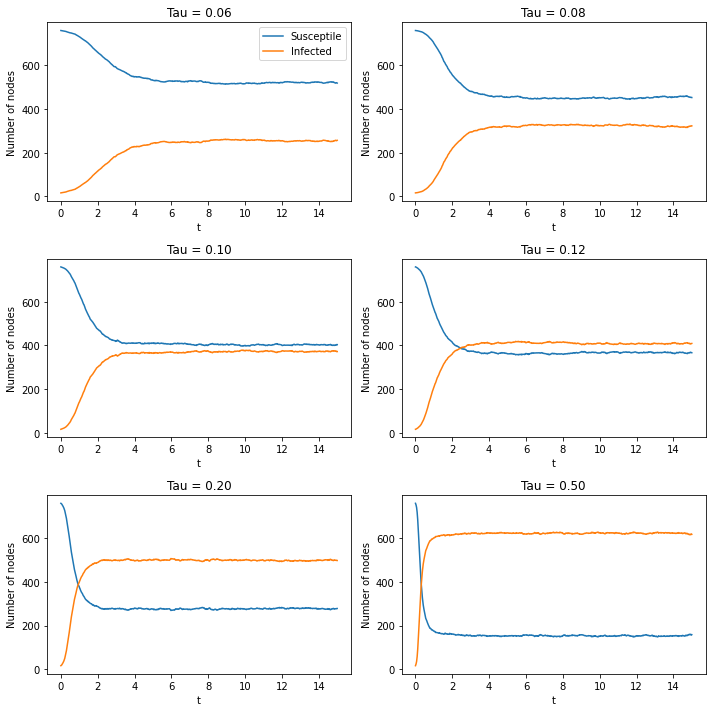

In [55]:
#run spreading simulations for six different tau values(likelihood to infect another person)
tau_values = [0.06,0.08,0.1,0.12,0.2,0.5]
gamma = 1
rho = 0.02

t1_EM_SIS,S1_EM_SIS,I1_EM_SIS = run_simulation_SIS(Emails,tau_values[0],gamma,rho)
t2_EM_SIS,S2_EM_SIS,I2_EM_SIS = run_simulation_SIS(Emails,tau_values[1],gamma,rho)
t3_EM_SIS,S3_EM_SIS,I3_EM_SIS = run_simulation_SIS(Emails,tau_values[2],gamma,rho)
t4_EM_SIS,S4_EM_SIS,I4_EM_SIS = run_simulation_SIS(Emails,tau_values[3],gamma,rho)
t5_EM_SIS,S5_EM_SIS,I5_EM_SIS = run_simulation_SIS(Emails,tau_values[4],gamma,rho)
t6_EM_SIS,S6_EM_SIS,I6_EM_SIS = run_simulation_SIS(Emails,tau_values[5],gamma,rho)

fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(321)

ax1.plot(t1_EM_SIS,S1_EM_SIS,label = 'Susceptile')
ax1.plot(t1_EM_SIS,I1_EM_SIS,label = 'Infected')
ax1.set_title('Tau = {:.2f}'.format(tau_values[0]))
ax1.set_xlabel("t")
ax1.set_ylabel("Number of nodes")
ax1.legend()

ax2 = fig.add_subplot(322)

ax2.plot(t2_EM_SIS,S2_EM_SIS,label = 'Susceptile')
ax2.plot(t2_EM_SIS,I2_EM_SIS,label = 'Infected')
ax2.set_title('Tau = {:.2f}'.format(tau_values[1]))
ax2.set_xlabel("t")
ax2.set_ylabel("Number of nodes")

ax3 = fig.add_subplot(323)

ax3.plot(t3_EM_SIS,S3_EM_SIS,label = 'Susceptile')
ax3.plot(t3_EM_SIS,I3_EM_SIS,label = 'Infected')
ax3.set_title('Tau = {:.2f}'.format(tau_values[2]))
ax3.set_xlabel("t")
ax3.set_ylabel("Number of nodes")

ax4 = fig.add_subplot(324)

ax4.plot(t4_EM_SIS,S4_EM_SIS,label = 'Susceptile')
ax4.plot(t4_EM_SIS,I4_EM_SIS,label = 'Infected')
ax4.set_title('Tau = {:.2f}'.format(tau_values[3]))
ax4.set_xlabel("t")
ax4.set_ylabel("Number of nodes")

ax5 = fig.add_subplot(325)

ax5.plot(t5_EM_SIS,S5_EM_SIS,label = 'Susceptile')
ax5.plot(t5_EM_SIS,I5_EM_SIS,label = 'Infected')
ax5.set_title('Tau = {:.2f}'.format(tau_values[4]))
ax5.set_xlabel("t")
ax5.set_ylabel("Number of nodes")

ax6 = fig.add_subplot(326)

ax6.plot(t6_EM_SIS,S6_EM_SIS,label = 'Susceptile')
ax6.plot(t6_EM_SIS,I6_EM_SIS,label = 'Infected')
ax6.set_title('Tau = {:.2f}'.format(tau_values[5]))
ax6.set_xlabel("t")
ax6.set_ylabel("Number of nodes")
plt.tight_layout()
plt.show()

doing Event-driven simulation


c:\users\tuomo\pycharmprojects\venv\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


doing Event-driven simulation
doing Event-driven simulation
doing Event-driven simulation
doing Event-driven simulation
doing Event-driven simulation


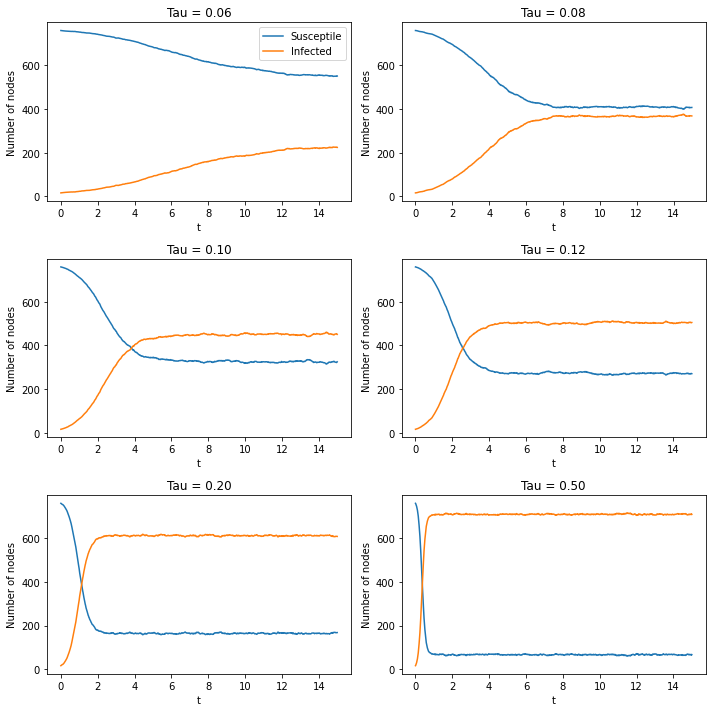

In [56]:
#ER
#run spreading simulations for six different tau values(likelihood to infect another person)
tau_values = [0.06,0.08,0.1,0.12,0.2,0.5]
gamma = 1
rho = 0.02

t1_ER_SIS,S1_ER_SIS,I1_ER_SIS = run_simulation_SIS(G_ER,tau_values[0],gamma,rho)
t2_ER_SIS,S2_ER_SIS,I2_ER_SIS = run_simulation_SIS(G_ER,tau_values[1],gamma,rho)
t3_ER_SIS,S3_ER_SIS,I3_ER_SIS = run_simulation_SIS(G_ER,tau_values[2],gamma,rho)
t4_ER_SIS,S4_ER_SIS,I4_ER_SIS = run_simulation_SIS(G_ER,tau_values[3],gamma,rho)
t5_ER_SIS,S5_ER_SIS,I5_ER_SIS = run_simulation_SIS(G_ER,tau_values[4],gamma,rho)
t6_ER_SIS,S6_ER_SIS,I6_ER_SIS = run_simulation_SIS(G_ER,tau_values[5],gamma,rho)

fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(321)

ax1.plot(t1_ER_SIS,S1_ER_SIS,label = 'Susceptile')
ax1.plot(t1_ER_SIS,I1_ER_SIS,label = 'Infected')
ax1.set_title('Tau = {:.2f}'.format(tau_values[0]))
ax1.set_xlabel("t")
ax1.set_ylabel("Number of nodes")
ax1.legend()

ax2 = fig.add_subplot(322)

ax2.plot(t2_ER_SIS,S2_ER_SIS,label = 'Susceptile')
ax2.plot(t2_ER_SIS,I2_ER_SIS,label = 'Infected')
ax2.set_title('Tau = {:.2f}'.format(tau_values[1]))
ax2.set_xlabel("t")
ax2.set_ylabel("Number of nodes")

ax3 = fig.add_subplot(323)

ax3.plot(t3_ER_SIS,S3_ER_SIS,label = 'Susceptile')
ax3.plot(t3_ER_SIS,I3_ER_SIS,label = 'Infected')
ax3.set_title('Tau = {:.2f}'.format(tau_values[2]))
ax3.set_xlabel("t")
ax3.set_ylabel("Number of nodes")

ax4 = fig.add_subplot(324)

ax4.plot(t4_ER_SIS,S4_ER_SIS,label = 'Susceptile')
ax4.plot(t4_ER_SIS,I4_ER_SIS,label = 'Infected')
ax4.set_title('Tau = {:.2f}'.format(tau_values[3]))
ax4.set_xlabel("t")
ax4.set_ylabel("Number of nodes")

ax5 = fig.add_subplot(325)

ax5.plot(t5_ER_SIS,S5_ER_SIS,label = 'Susceptile')
ax5.plot(t5_ER_SIS,I5_ER_SIS,label = 'Infected')
ax5.set_title('Tau = {:.2f}'.format(tau_values[4]))
ax5.set_xlabel("t")
ax5.set_ylabel("Number of nodes")

ax6 = fig.add_subplot(326)

ax6.plot(t6_ER_SIS,S6_ER_SIS,label = 'Susceptile')
ax6.plot(t6_ER_SIS,I6_ER_SIS,label = 'Infected')
ax6.set_title('Tau = {:.2f}'.format(tau_values[5]))
ax6.set_xlabel("t")
ax6.set_ylabel("Number of nodes")
plt.tight_layout()
plt.show()

doing Event-driven simulation


c:\users\tuomo\pycharmprojects\venv\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


doing Event-driven simulation
doing Event-driven simulation
doing Event-driven simulation
doing Event-driven simulation
doing Event-driven simulation


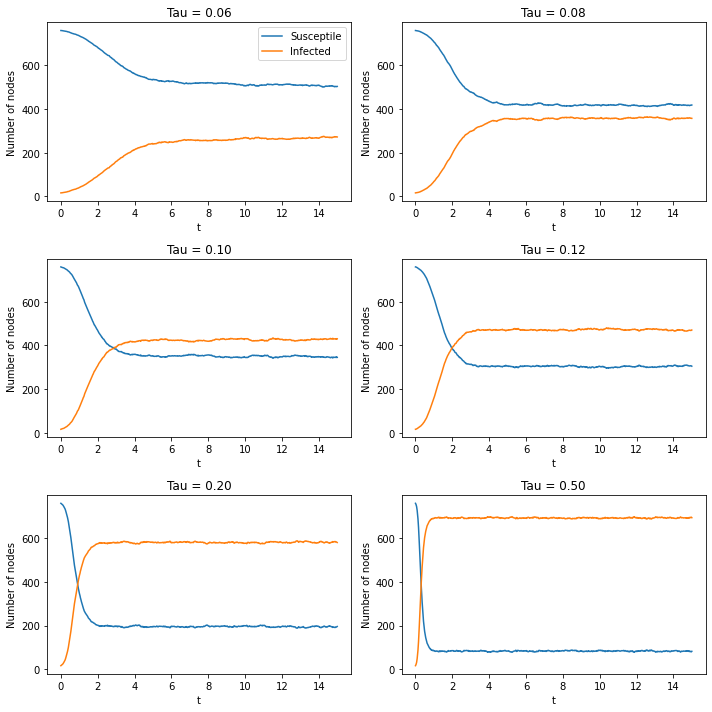

In [57]:
#BA
#run spreading simulations for six different tau values(likelihood to infect another person)
tau_values = [0.06,0.08,0.1,0.12,0.2,0.5]
gamma = 1
rho = 0.02

t1_BA_SIS,S1_BA_SIS,I1_BA_SIS = run_simulation_SIS(G_BA,tau_values[0],gamma,rho)
t2_BA_SIS,S2_BA_SIS,I2_BA_SIS = run_simulation_SIS(G_BA,tau_values[1],gamma,rho)
t3_BA_SIS,S3_BA_SIS,I3_BA_SIS = run_simulation_SIS(G_BA,tau_values[2],gamma,rho)
t4_BA_SIS,S4_BA_SIS,I4_BA_SIS = run_simulation_SIS(G_BA,tau_values[3],gamma,rho)
t5_BA_SIS,S5_BA_SIS,I5_BA_SIS = run_simulation_SIS(G_BA,tau_values[4],gamma,rho)
t6_BA_SIS,S6_BA_SIS,I6_BA_SIS = run_simulation_SIS(G_BA,tau_values[5],gamma,rho)

fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(321)

ax1.plot(t1_BA_SIS,S1_BA_SIS,label = 'Susceptile')
ax1.plot(t1_BA_SIS,I1_BA_SIS,label = 'Infected')
ax1.set_title('Tau = {:.2f}'.format(tau_values[0]))
ax1.set_xlabel("t")
ax1.set_ylabel("Number of nodes")
ax1.legend()

ax2 = fig.add_subplot(322)

ax2.plot(t2_BA_SIS,S2_BA_SIS,label = 'Susceptile')
ax2.plot(t2_BA_SIS,I2_BA_SIS,label = 'Infected')
ax2.set_title('Tau = {:.2f}'.format(tau_values[1]))
ax2.set_xlabel("t")
ax2.set_ylabel("Number of nodes")

ax3 = fig.add_subplot(323)

ax3.plot(t3_BA_SIS,S3_BA_SIS,label = 'Susceptile')
ax3.plot(t3_BA_SIS,I3_BA_SIS,label = 'Infected')
ax3.set_title('Tau = {:.2f}'.format(tau_values[2]))
ax3.set_xlabel("t")
ax3.set_ylabel("Number of nodes")

ax4 = fig.add_subplot(324)

ax4.plot(t4_BA_SIS,S4_BA_SIS,label = 'Susceptile')
ax4.plot(t4_BA_SIS,I4_BA_SIS,label = 'Infected')
ax4.set_title('Tau = {:.2f}'.format(tau_values[3]))
ax4.set_xlabel("t")
ax4.set_ylabel("Number of nodes")

ax5 = fig.add_subplot(325)

ax5.plot(t5_BA_SIS,S5_BA_SIS,label = 'Susceptile')
ax5.plot(t5_BA_SIS,I5_BA_SIS,label = 'Infected')
ax5.set_title('Tau = {:.2f}'.format(tau_values[4]))
ax5.set_xlabel("t")
ax5.set_ylabel("Number of nodes")

ax6 = fig.add_subplot(326)

ax6.plot(t6_BA_SIS,S6_BA_SIS,label = 'Susceptile')
ax6.plot(t6_BA_SIS,I6_BA_SIS,label = 'Infected')
ax6.set_title('Tau = {:.2f}'.format(tau_values[5]))
ax6.set_xlabel("t")
ax6.set_ylabel("Number of nodes")
plt.tight_layout()
plt.show()

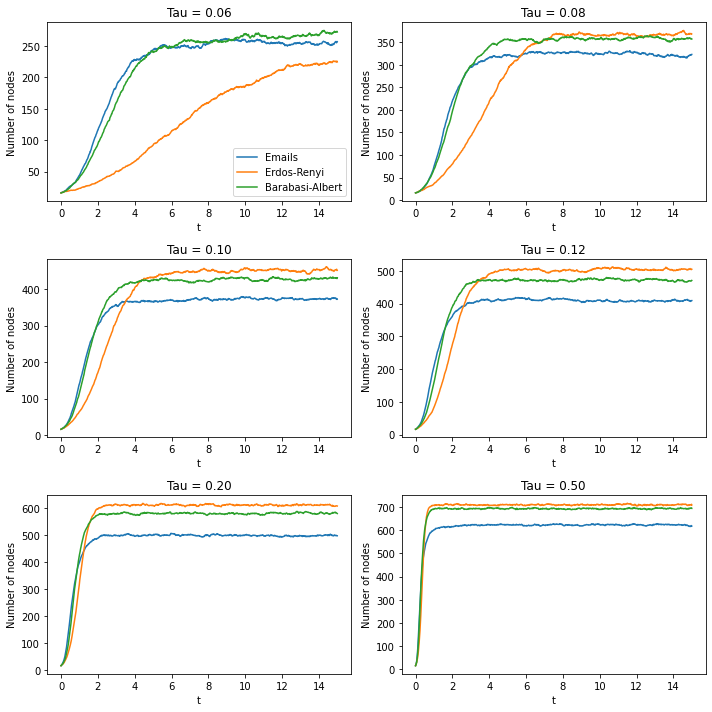

In [58]:
#lets compare infected curves among three networks
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(321)

ax1.plot(t1_EM_SIS,I1_EM_SIS,label = 'Emails')
ax1.plot(t1_ER_SIS,I1_ER_SIS,label = 'Erdos-Renyi')
ax1.plot(t1_BA_SIS,I1_BA_SIS,label = 'Barabasi-Albert')
ax1.set_title('Tau = {:.2f}'.format(tau_values[0]))
ax1.set_xlabel("t")
ax1.set_ylabel("Number of nodes")
ax1.legend()

ax2 = fig.add_subplot(322)

ax2.plot(t2_EM_SIS,I2_EM_SIS,label = 'Emails')
ax2.plot(t2_ER_SIS,I2_ER_SIS,label = 'Erdos-Renyi')
ax2.plot(t2_BA_SIS,I2_BA_SIS,label = 'Barabasi-Albert')
ax2.set_title('Tau = {:.2f}'.format(tau_values[1]))
ax2.set_xlabel("t")
ax2.set_ylabel("Number of nodes")

ax3 = fig.add_subplot(323)

ax3.plot(t3_EM_SIS,I3_EM_SIS,label = 'Emails')
ax3.plot(t3_ER_SIS,I3_ER_SIS,label = 'Erdos-Renyi')
ax3.plot(t3_BA_SIS,I3_BA_SIS,label = 'Barabasi-Albert')
ax3.set_title('Tau = {:.2f}'.format(tau_values[2]))
ax3.set_xlabel("t")
ax3.set_ylabel("Number of nodes")

ax4 = fig.add_subplot(324)

ax4.plot(t4_EM_SIS,I4_EM_SIS,label = 'Emails')
ax4.plot(t4_ER_SIS,I4_ER_SIS,label = 'Erdos-Renyi')
ax4.plot(t4_BA_SIS,I4_BA_SIS,label = 'Barabasi-Albert')
ax4.set_title('Tau = {:.2f}'.format(tau_values[3]))
ax4.set_xlabel("t")
ax4.set_ylabel("Number of nodes")

ax5 = fig.add_subplot(325)

ax5.plot(t5_EM_SIS,I5_EM_SIS,label = 'Emails')
ax5.plot(t5_ER_SIS,I5_ER_SIS,label = 'Erdos-Renyi')
ax5.plot(t5_BA_SIS,I5_BA_SIS,label = 'Barabasi-Albert')
ax5.set_title('Tau = {:.2f}'.format(tau_values[4]))
ax5.set_xlabel("t")
ax5.set_ylabel("Number of nodes")

ax6 = fig.add_subplot(326)

ax6.plot(t6_EM_SIS,I6_EM_SIS,label = 'Emails')
ax6.plot(t6_ER_SIS,I6_ER_SIS,label = 'Erdos-Renyi')
ax6.plot(t6_BA_SIS,I6_BA_SIS,label = 'Barabasi-Albert')
ax6.set_title('Tau = {:.2f}'.format(tau_values[5]))
ax6.set_xlabel("t")
ax6.set_ylabel("Number of nodes")
plt.tight_layout()
plt.show()

In [59]:
def compute_average_values_SIR(simulations_T,simulations_S,simulations_I,simulations_R):
    
    sim_T = simulations_T
    sim_S = simulations_S
    sim_I = simulations_I
    sim_R = simulations_R
    #find smallest t found
    times = []
    for sim in range(np.size(sim_T)):
        times.append(sim_T[sim][-1])
    smallest_time = min(times)
    
    #subsample values into fixed times
    subsampled_S = []
    subsampled_I = []
    subsampled_R = []
    subsampled_ts = np.linspace(0.0, smallest_time, 1000)
    for sim in range(np.size(sim_T)):
        t = sim_T[sim]
        S = sim_S[sim]
        I = sim_I[sim]
        R = sim_R[sim]
        subS,subI,subR = EoN.subsample(subsampled_ts, t, S, I, R)
        subsampled_S.append(subS)
        subsampled_I.append(subI)
        subsampled_R.append(subR)
    
    final_times = subsampled_ts
    avg_S = []
    avg_I = []
    avg_R = []
    for time in range(len(final_times)):
        
        SS = []
        II = []
        RR = []
        for index in range(len(subsampled_R)):
            SS.append(subsampled_S[index][time])
            II.append(subsampled_I[index][time])
            RR.append(subsampled_R[index][time])
        avg_S.append(np.mean(SS))
        avg_I.append(np.mean(II))
        avg_R.append(np.mean(RR))
    return final_times,avg_S,avg_I,avg_R

In [60]:
def run_simulation_SIR(G,tau,gamma,rho):
    print('doing Event-driven simulation')
    simulations_time = []
    simulations_S = []
    simulations_I = []
    simulations_R = []
    for sim in range(20):
        t1, S1, I1, R1 = EoN.fast_SIR(G, tau, gamma, rho=rho)
        simulations_time.append(t1)
        simulations_S.append(S1)
        simulations_I.append(I1)
        simulations_R.append(R1)
    t,S,I,R = compute_average_values_SIR(simulations_time,simulations_S,simulations_I,simulations_R)
    return t,S,I,R

doing Event-driven simulation


c:\users\tuomo\pycharmprojects\venv\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


doing Event-driven simulation
doing Event-driven simulation
doing Event-driven simulation
doing Event-driven simulation
doing Event-driven simulation


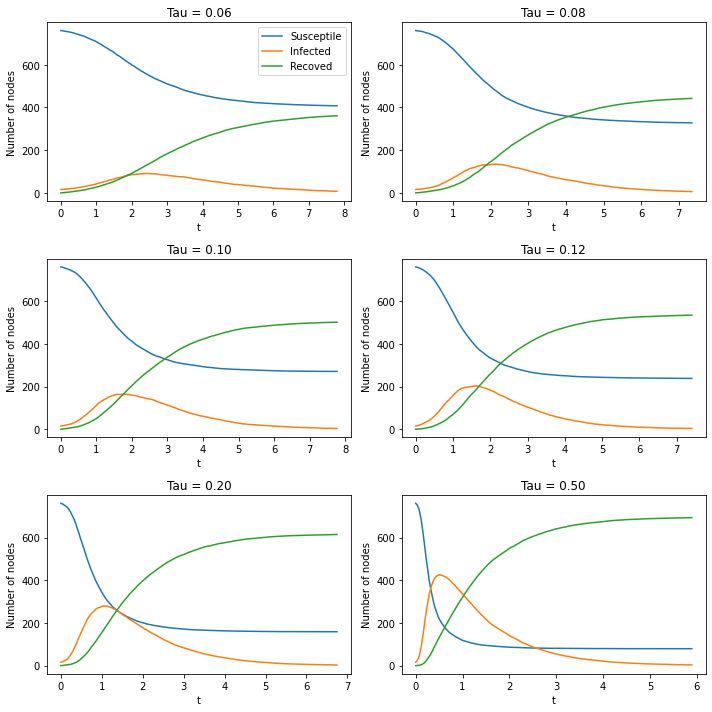

In [61]:
#run spreading simulations for six different tau values(likelihood to infect another person)
tau_values = [0.06,0.08,0.1,0.12,0.2,0.5]
gamma = 1
rho = 0.02

t1_EM,S1_EM,I1_EM,R1_EM = run_simulation_SIR(Emails,tau_values[0],gamma,rho)
t2_EM,S2_EM,I2_EM,R2_EM = run_simulation_SIR(Emails,tau_values[1],gamma,rho)
t3_EM,S3_EM,I3_EM,R3_EM = run_simulation_SIR(Emails,tau_values[2],gamma,rho)
t4_EM,S4_EM,I4_EM,R4_EM = run_simulation_SIR(Emails,tau_values[3],gamma,rho)
t5_EM,S5_EM,I5_EM,R5_EM = run_simulation_SIR(Emails,tau_values[4],gamma,rho)
t6_EM,S6_EM,I6_EM,R6_EM = run_simulation_SIR(Emails,tau_values[5],gamma,rho)

fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(321)

ax1.plot(t1_EM,S1_EM,label = 'Susceptile')
ax1.plot(t1_EM,I1_EM,label = 'Infected')
ax1.plot(t1_EM,R1_EM,label = 'Recoved')
ax1.set_title('Tau = {:.2f}'.format(tau_values[0]))
ax1.set_xlabel("t")
ax1.set_ylabel("Number of nodes")
ax1.legend()

ax2 = fig.add_subplot(322)

ax2.plot(t2_EM,S2_EM,label = 'Susceptile')
ax2.plot(t2_EM,I2_EM,label = 'Infected')
ax2.plot(t2_EM,R2_EM,label = 'Recoved')
ax2.set_title('Tau = {:.2f}'.format(tau_values[1]))
ax2.set_xlabel("t")
ax2.set_ylabel("Number of nodes")

ax3 = fig.add_subplot(323)

ax3.plot(t3_EM,S3_EM,label = 'Susceptile')
ax3.plot(t3_EM,I3_EM,label = 'Infected')
ax3.plot(t3_EM,R3_EM,label = 'Recoved')
ax3.set_title('Tau = {:.2f}'.format(tau_values[2]))
ax3.set_xlabel("t")
ax3.set_ylabel("Number of nodes")

ax4 = fig.add_subplot(324)

ax4.plot(t4_EM,S4_EM,label = 'Susceptile')
ax4.plot(t4_EM,I4_EM,label = 'Infected')
ax4.plot(t4_EM,R4_EM,label = 'Recoved')
ax4.set_title('Tau = {:.2f}'.format(tau_values[3]))
ax4.set_xlabel("t")
ax4.set_ylabel("Number of nodes")

ax5 = fig.add_subplot(325)

ax5.plot(t5_EM,S5_EM,label = 'Susceptile')
ax5.plot(t5_EM,I5_EM,label = 'Infected')
ax5.plot(t5_EM,R5_EM,label = 'Recoved')
ax5.set_title('Tau = {:.2f}'.format(tau_values[4]))
ax5.set_xlabel("t")
ax5.set_ylabel("Number of nodes")

ax6 = fig.add_subplot(326)

ax6.plot(t6_EM,S6_EM,label = 'Susceptile')
ax6.plot(t6_EM,I6_EM,label = 'Infected')
ax6.plot(t6_EM,R6_EM,label = 'Recoved')
ax6.set_title('Tau = {:.2f}'.format(tau_values[5]))
ax6.set_xlabel("t")
ax6.set_ylabel("Number of nodes")
plt.tight_layout()
plt.show()

doing Event-driven simulation


c:\users\tuomo\pycharmprojects\venv\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


doing Event-driven simulation
doing Event-driven simulation
doing Event-driven simulation
doing Event-driven simulation
doing Event-driven simulation


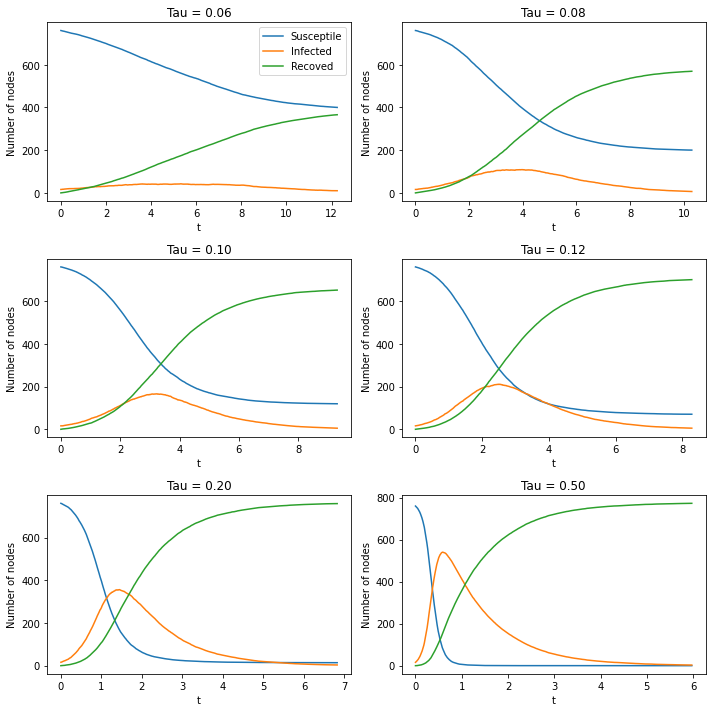

In [62]:
#ER
#run spreading simulations for six different tau values(likelihood to infect another person)
tau_values = [0.06,0.08,0.1,0.12,0.2,0.5]
gamma = 1
rho = 0.02

t1_ER,S1_ER,I1_ER,R1_ER = run_simulation_SIR(G_ER,tau_values[0],gamma,rho)
t2_ER,S2_ER,I2_ER,R2_ER = run_simulation_SIR(G_ER,tau_values[1],gamma,rho)
t3_ER,S3_ER,I3_ER,R3_ER = run_simulation_SIR(G_ER,tau_values[2],gamma,rho)
t4_ER,S4_ER,I4_ER,R4_ER = run_simulation_SIR(G_ER,tau_values[3],gamma,rho)
t5_ER,S5_ER,I5_ER,R5_ER = run_simulation_SIR(G_ER,tau_values[4],gamma,rho)
t6_ER,S6_ER,I6_ER,R6_ER = run_simulation_SIR(G_ER,tau_values[5],gamma,rho)

fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(321)

ax1.plot(t1_ER,S1_ER,label = 'Susceptile')
ax1.plot(t1_ER,I1_ER,label = 'Infected')
ax1.plot(t1_ER,R1_ER,label = 'Recoved')
ax1.set_title('Tau = {:.2f}'.format(tau_values[0]))
ax1.set_xlabel("t")
ax1.set_ylabel("Number of nodes")
ax1.legend()

ax2 = fig.add_subplot(322)

ax2.plot(t2_ER,S2_ER,label = 'Susceptile')
ax2.plot(t2_ER,I2_ER,label = 'Infected')
ax2.plot(t2_ER,R2_ER,label = 'Recoved')
ax2.set_title('Tau = {:.2f}'.format(tau_values[1]))
ax2.set_xlabel("t")
ax2.set_ylabel("Number of nodes")

ax3 = fig.add_subplot(323)

ax3.plot(t3_ER,S3_ER,label = 'Susceptile')
ax3.plot(t3_ER,I3_ER,label = 'Infected')
ax3.plot(t3_ER,R3_ER,label = 'Recoved')
ax3.set_title('Tau = {:.2f}'.format(tau_values[2]))
ax3.set_xlabel("t")
ax3.set_ylabel("Number of nodes")

ax4 = fig.add_subplot(324)

ax4.plot(t4_ER,S4_ER,label = 'Susceptile')
ax4.plot(t4_ER,I4_ER,label = 'Infected')
ax4.plot(t4_ER,R4_ER,label = 'Recoved')
ax4.set_title('Tau = {:.2f}'.format(tau_values[3]))
ax4.set_xlabel("t")
ax4.set_ylabel("Number of nodes")

ax5 = fig.add_subplot(325)

ax5.plot(t5_ER,S5_ER,label = 'Susceptile')
ax5.plot(t5_ER,I5_ER,label = 'Infected')
ax5.plot(t5_ER,R5_ER,label = 'Recoved')
ax5.set_title('Tau = {:.2f}'.format(tau_values[4]))
ax5.set_xlabel("t")
ax5.set_ylabel("Number of nodes")

ax6 = fig.add_subplot(326)

ax6.plot(t6_ER,S6_ER,label = 'Susceptile')
ax6.plot(t6_ER,I6_ER,label = 'Infected')
ax6.plot(t6_ER,R6_ER,label = 'Recoved')
ax6.set_title('Tau = {:.2f}'.format(tau_values[5]))
ax6.set_xlabel("t")
ax6.set_ylabel("Number of nodes")
plt.tight_layout()
plt.show()

doing Event-driven simulation


c:\users\tuomo\pycharmprojects\venv\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


doing Event-driven simulation
doing Event-driven simulation
doing Event-driven simulation
doing Event-driven simulation
doing Event-driven simulation


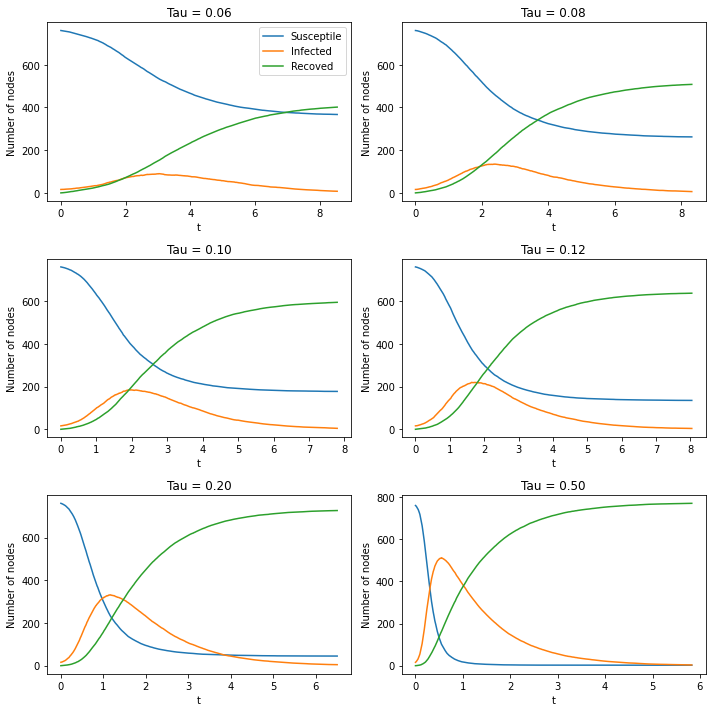

In [63]:
#BA
#run spreading simulations for six different tau values(likelihood to infect another person)
tau_values = [0.06,0.08,0.1,0.12,0.2,0.5]
gamma = 1
rho = 0.02

t1_BA,S1_BA,I1_BA,R1_BA = run_simulation_SIR(G_BA,tau_values[0],gamma,rho)
t2_BA,S2_BA,I2_BA,R2_BA = run_simulation_SIR(G_BA,tau_values[1],gamma,rho)
t3_BA,S3_BA,I3_BA,R3_BA = run_simulation_SIR(G_BA,tau_values[2],gamma,rho)
t4_BA,S4_BA,I4_BA,R4_BA = run_simulation_SIR(G_BA,tau_values[3],gamma,rho)
t5_BA,S5_BA,I5_BA,R5_BA = run_simulation_SIR(G_BA,tau_values[4],gamma,rho)
t6_BA,S6_BA,I6_BA,R6_BA = run_simulation_SIR(G_BA,tau_values[5],gamma,rho)

fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(321)

ax1.plot(t1_BA,S1_BA,label = 'Susceptile')
ax1.plot(t1_BA,I1_BA,label = 'Infected')
ax1.plot(t1_BA,R1_BA,label = 'Recoved')
ax1.set_title('Tau = {:.2f}'.format(tau_values[0]))
ax1.set_xlabel("t")
ax1.set_ylabel("Number of nodes")
ax1.legend()

ax2 = fig.add_subplot(322)

ax2.plot(t2_BA,S2_BA,label = 'Susceptile')
ax2.plot(t2_BA,I2_BA,label = 'Infected')
ax2.plot(t2_BA,R2_BA,label = 'Recoved')
ax2.set_title('Tau = {:.2f}'.format(tau_values[1]))
ax2.set_xlabel("t")
ax2.set_ylabel("Number of nodes")

ax3 = fig.add_subplot(323)

ax3.plot(t3_BA,S3_BA,label = 'Susceptile')
ax3.plot(t3_BA,I3_BA,label = 'Infected')
ax3.plot(t3_BA,R3_BA,label = 'Recoved')
ax3.set_title('Tau = {:.2f}'.format(tau_values[2]))
ax3.set_xlabel("t")
ax3.set_ylabel("Number of nodes")

ax4 = fig.add_subplot(324)

ax4.plot(t4_BA,S4_BA,label = 'Susceptile')
ax4.plot(t4_BA,I4_BA,label = 'Infected')
ax4.plot(t4_BA,R4_BA,label = 'Recoved')
ax4.set_title('Tau = {:.2f}'.format(tau_values[3]))
ax4.set_xlabel("t")
ax4.set_ylabel("Number of nodes")

ax5 = fig.add_subplot(325)

ax5.plot(t5_BA,S5_BA,label = 'Susceptile')
ax5.plot(t5_BA,I5_BA,label = 'Infected')
ax5.plot(t5_BA,R5_BA,label = 'Recoved')
ax5.set_title('Tau = {:.2f}'.format(tau_values[4]))
ax5.set_xlabel("t")
ax5.set_ylabel("Number of nodes")

ax6 = fig.add_subplot(326)

ax6.plot(t6_BA,S6_BA,label = 'Susceptile')
ax6.plot(t6_BA,I6_BA,label = 'Infected')
ax6.plot(t6_BA,R6_BA,label = 'Recoved')
ax6.set_title('Tau = {:.2f}'.format(tau_values[5]))
ax6.set_xlabel("t")
ax6.set_ylabel("Number of nodes")
plt.tight_layout()
plt.show()

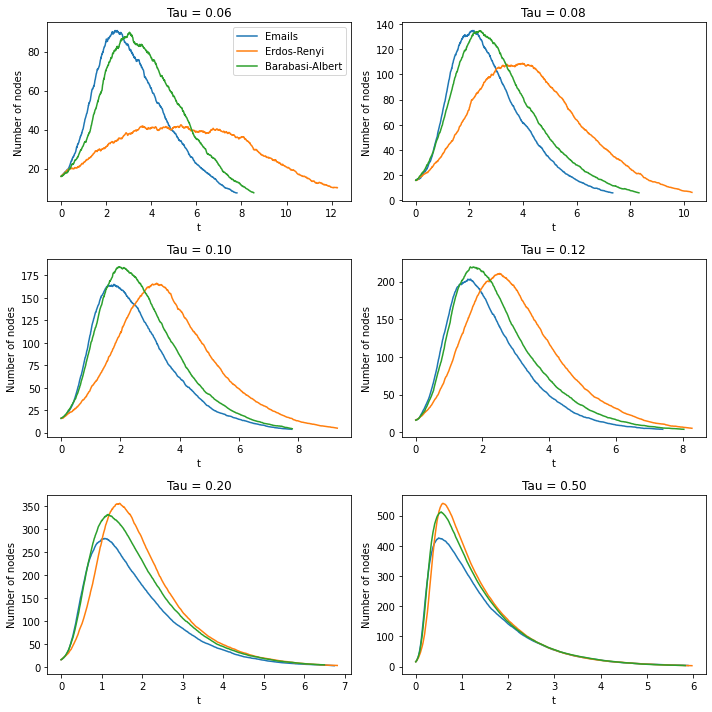

In [64]:
#lets compare infected curves among three networks
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(321)

ax1.plot(t1_EM,I1_EM,label = 'Emails')
ax1.plot(t1_ER,I1_ER,label = 'Erdos-Renyi')
ax1.plot(t1_BA,I1_BA,label = 'Barabasi-Albert')
ax1.set_title('Tau = {:.2f}'.format(tau_values[0]))
ax1.set_xlabel("t")
ax1.set_ylabel("Number of nodes")
ax1.legend()

ax2 = fig.add_subplot(322)

ax2.plot(t2_EM,I2_EM,label = 'Emails')
ax2.plot(t2_ER,I2_ER,label = 'Erdos-Renyi')
ax2.plot(t2_BA,I2_BA,label = 'Barabasi-Albert')
ax2.set_title('Tau = {:.2f}'.format(tau_values[1]))
ax2.set_xlabel("t")
ax2.set_ylabel("Number of nodes")

ax3 = fig.add_subplot(323)

ax3.plot(t3_EM,I3_EM,label = 'Emails')
ax3.plot(t3_ER,I3_ER,label = 'Erdos-Renyi')
ax3.plot(t3_BA,I3_BA,label = 'Barabasi-Albert')
ax3.set_title('Tau = {:.2f}'.format(tau_values[2]))
ax3.set_xlabel("t")
ax3.set_ylabel("Number of nodes")

ax4 = fig.add_subplot(324)

ax4.plot(t4_EM,I4_EM,label = 'Emails')
ax4.plot(t4_ER,I4_ER,label = 'Erdos-Renyi')
ax4.plot(t4_BA,I4_BA,label = 'Barabasi-Albert')
ax4.set_title('Tau = {:.2f}'.format(tau_values[3]))
ax4.set_xlabel("t")
ax4.set_ylabel("Number of nodes")

ax5 = fig.add_subplot(325)

ax5.plot(t5_EM,I5_EM,label = 'Emails')
ax5.plot(t5_ER,I5_ER,label = 'Erdos-Renyi')
ax5.plot(t5_BA,I5_BA,label = 'Barabasi-Albert')
ax5.set_title('Tau = {:.2f}'.format(tau_values[4]))
ax5.set_xlabel("t")
ax5.set_ylabel("Number of nodes")

ax6 = fig.add_subplot(326)

ax6.plot(t6_EM,I6_EM,label = 'Emails')
ax6.plot(t6_ER,I6_ER,label = 'Erdos-Renyi')
ax6.plot(t6_BA,I6_BA,label = 'Barabasi-Albert')
ax6.set_title('Tau = {:.2f}'.format(tau_values[5]))
ax6.set_xlabel("t")
ax6.set_ylabel("Number of nodes")
plt.tight_layout()
plt.show()
#Seems that Barabasi-Albert network and Email network are pretty smiliar in SIR simulation. Erdos-Renyi network is very different. Spreading happens
#slower. Reason might be that Erdos-Renyi network does not have hubs. Also seems that in higher tau values(spreading probability) Barabasi-Albert 
#network grows more than Email network, otherwise curves are very similiar.

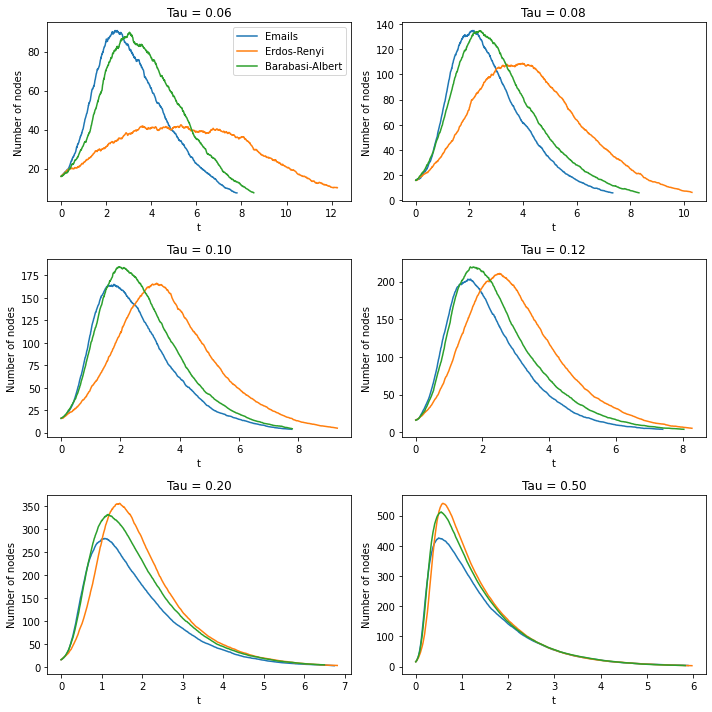

In [65]:
#lets compare infected curves among three networks
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(321)

ax1.plot(t1_EM,I1_EM,label = 'Emails')
ax1.plot(t1_ER,I1_ER,label = 'Erdos-Renyi')
ax1.plot(t1_BA,I1_BA,label = 'Barabasi-Albert')
ax1.set_title('Tau = {:.2f}'.format(tau_values[0]))
ax1.set_xlabel("t")
ax1.set_ylabel("Number of nodes")
ax1.legend()

ax2 = fig.add_subplot(322)

ax2.plot(t2_EM,I2_EM,label = 'Emails')
ax2.plot(t2_ER,I2_ER,label = 'Erdos-Renyi')
ax2.plot(t2_BA,I2_BA,label = 'Barabasi-Albert')
ax2.set_title('Tau = {:.2f}'.format(tau_values[1]))
ax2.set_xlabel("t")
ax2.set_ylabel("Number of nodes")

ax3 = fig.add_subplot(323)

ax3.plot(t3_EM,I3_EM,label = 'Emails')
ax3.plot(t3_ER,I3_ER,label = 'Erdos-Renyi')
ax3.plot(t3_BA,I3_BA,label = 'Barabasi-Albert')
ax3.set_title('Tau = {:.2f}'.format(tau_values[2]))
ax3.set_xlabel("t")
ax3.set_ylabel("Number of nodes")

ax4 = fig.add_subplot(324)

ax4.plot(t4_EM,I4_EM,label = 'Emails')
ax4.plot(t4_ER,I4_ER,label = 'Erdos-Renyi')
ax4.plot(t4_BA,I4_BA,label = 'Barabasi-Albert')
ax4.set_title('Tau = {:.2f}'.format(tau_values[3]))
ax4.set_xlabel("t")
ax4.set_ylabel("Number of nodes")

ax5 = fig.add_subplot(325)

ax5.plot(t5_EM,I5_EM,label = 'Emails')
ax5.plot(t5_ER,I5_ER,label = 'Erdos-Renyi')
ax5.plot(t5_BA,I5_BA,label = 'Barabasi-Albert')
ax5.set_title('Tau = {:.2f}'.format(tau_values[4]))
ax5.set_xlabel("t")
ax5.set_ylabel("Number of nodes")

ax6 = fig.add_subplot(326)

ax6.plot(t6_EM,I6_EM,label = 'Emails')
ax6.plot(t6_ER,I6_ER,label = 'Erdos-Renyi')
ax6.plot(t6_BA,I6_BA,label = 'Barabasi-Albert')
ax6.set_title('Tau = {:.2f}'.format(tau_values[5]))
ax6.set_xlabel("t")
ax6.set_ylabel("Number of nodes")
plt.tight_layout()
plt.show()

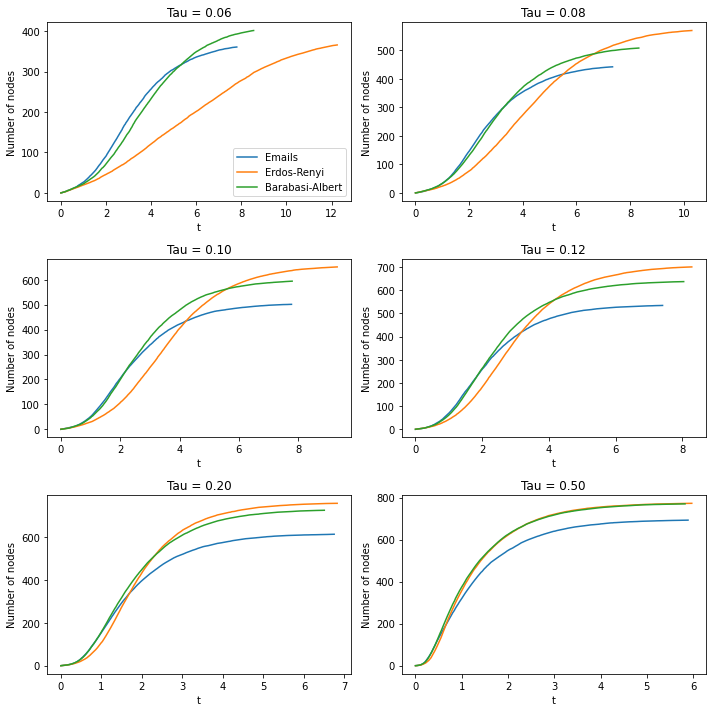

In [66]:
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(321)

ax1.plot(t1_EM,R1_EM,label = 'Emails')
ax1.plot(t1_ER,R1_ER,label = 'Erdos-Renyi')
ax1.plot(t1_BA,R1_BA,label = 'Barabasi-Albert')
ax1.set_title('Tau = {:.2f}'.format(tau_values[0]))
ax1.set_xlabel("t")
ax1.set_ylabel("Number of nodes")
ax1.legend()

ax2 = fig.add_subplot(322)

ax2.plot(t2_EM,R2_EM,label = 'Emails')
ax2.plot(t2_ER,R2_ER,label = 'Erdos-Renyi')
ax2.plot(t2_BA,R2_BA,label = 'Barabasi-Albert')
ax2.set_title('Tau = {:.2f}'.format(tau_values[1]))
ax2.set_xlabel("t")
ax2.set_ylabel("Number of nodes")

ax3 = fig.add_subplot(323)

ax3.plot(t3_EM,R3_EM,label = 'Emails')
ax3.plot(t3_ER,R3_ER,label = 'Erdos-Renyi')
ax3.plot(t3_BA,R3_BA,label = 'Barabasi-Albert')
ax3.set_title('Tau = {:.2f}'.format(tau_values[2]))
ax3.set_xlabel("t")
ax3.set_ylabel("Number of nodes")

ax4 = fig.add_subplot(324)

ax4.plot(t4_EM,R4_EM,label = 'Emails')
ax4.plot(t4_ER,R4_ER,label = 'Erdos-Renyi')
ax4.plot(t4_BA,R4_BA,label = 'Barabasi-Albert')
ax4.set_title('Tau = {:.2f}'.format(tau_values[3]))
ax4.set_xlabel("t")
ax4.set_ylabel("Number of nodes")

ax5 = fig.add_subplot(325)

ax5.plot(t5_EM,R5_EM,label = 'Emails')
ax5.plot(t5_ER,R5_ER,label = 'Erdos-Renyi')
ax5.plot(t5_BA,R5_BA,label = 'Barabasi-Albert')
ax5.set_title('Tau = {:.2f}'.format(tau_values[4]))
ax5.set_xlabel("t")
ax5.set_ylabel("Number of nodes")

ax6 = fig.add_subplot(326)

ax6.plot(t6_EM,R6_EM,label = 'Emails')
ax6.plot(t6_ER,R6_ER,label = 'Erdos-Renyi')
ax6.plot(t6_BA,R6_BA,label = 'Barabasi-Albert')
ax6.set_title('Tau = {:.2f}'.format(tau_values[5]))
ax6.set_xlabel("t")
ax6.set_ylabel("Number of nodes")
plt.tight_layout()
plt.show()

doing Event-driven simulation


c:\users\tuomo\pycharmprojects\venv\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


doing Event-driven simulation
doing Event-driven simulation
doing Event-driven simulation
doing Event-driven simulation
doing Event-driven simulation


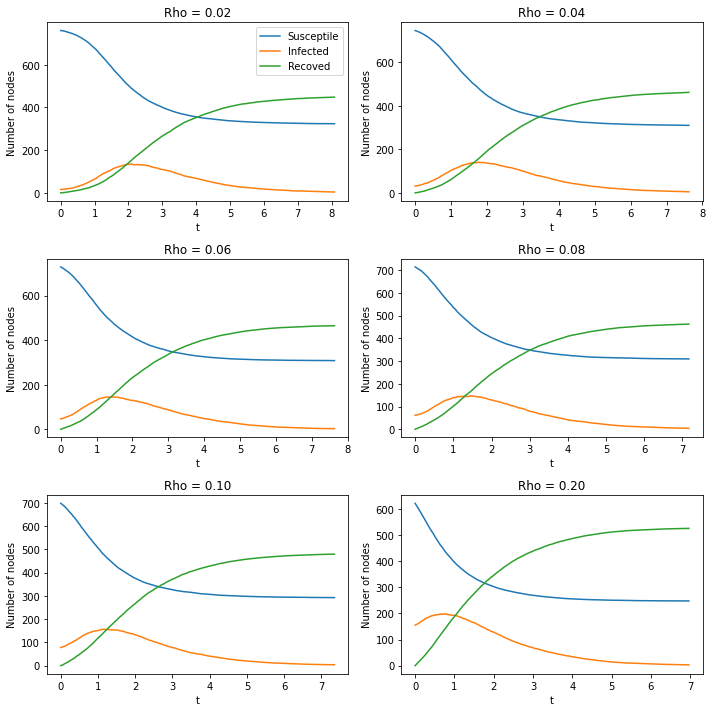

In [73]:
rho_values = [0.02,0.04,0.06,0.08,0.10,0.20]
tau = 0.08
gamma = 1

t1_EM,S1_EM,I1_EM,R1_EM = run_simulation_SIR(Emails,tau,gamma,rho_values[0])
t2_EM,S2_EM,I2_EM,R2_EM = run_simulation_SIR(Emails,tau,gamma,rho_values[1])
t3_EM,S3_EM,I3_EM,R3_EM = run_simulation_SIR(Emails,tau,gamma,rho_values[2])
t4_EM,S4_EM,I4_EM,R4_EM = run_simulation_SIR(Emails,tau,gamma,rho_values[3])
t5_EM,S5_EM,I5_EM,R5_EM = run_simulation_SIR(Emails,tau,gamma,rho_values[4])
t6_EM,S6_EM,I6_EM,R6_EM = run_simulation_SIR(Emails,tau,gamma,rho_values[5])

fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(321)

ax1.plot(t1_EM,S1_EM,label = 'Susceptile')
ax1.plot(t1_EM,I1_EM,label = 'Infected')
ax1.plot(t1_EM,R1_EM,label = 'Recoved')
ax1.set_title('Rho = {:.2f}'.format(rho_values[0]))
ax1.set_xlabel("t")
ax1.set_ylabel("Number of nodes")
ax1.legend()

ax2 = fig.add_subplot(322)

ax2.plot(t2_EM,S2_EM,label = 'Susceptile')
ax2.plot(t2_EM,I2_EM,label = 'Infected')
ax2.plot(t2_EM,R2_EM,label = 'Recoved')
ax2.set_title('Rho = {:.2f}'.format(rho_values[1]))
ax2.set_xlabel("t")
ax2.set_ylabel("Number of nodes")

ax3 = fig.add_subplot(323)

ax3.plot(t3_EM,S3_EM,label = 'Susceptile')
ax3.plot(t3_EM,I3_EM,label = 'Infected')
ax3.plot(t3_EM,R3_EM,label = 'Recoved')
ax3.set_title('Rho = {:.2f}'.format(rho_values[2]))
ax3.set_xlabel("t")
ax3.set_ylabel("Number of nodes")

ax4 = fig.add_subplot(324)

ax4.plot(t4_EM,S4_EM,label = 'Susceptile')
ax4.plot(t4_EM,I4_EM,label = 'Infected')
ax4.plot(t4_EM,R4_EM,label = 'Recoved')
ax4.set_title('Rho = {:.2f}'.format(rho_values[3]))
ax4.set_xlabel("t")
ax4.set_ylabel("Number of nodes")

ax5 = fig.add_subplot(325)

ax5.plot(t5_EM,S5_EM,label = 'Susceptile')
ax5.plot(t5_EM,I5_EM,label = 'Infected')
ax5.plot(t5_EM,R5_EM,label = 'Recoved')
ax5.set_title('Rho = {:.2f}'.format(rho_values[4]))
ax5.set_xlabel("t")
ax5.set_ylabel("Number of nodes")

ax6 = fig.add_subplot(326)

ax6.plot(t6_EM,S6_EM,label = 'Susceptile')
ax6.plot(t6_EM,I6_EM,label = 'Infected')
ax6.plot(t6_EM,R6_EM,label = 'Recoved')
ax6.set_title('Rho = {:.2f}'.format(rho_values[5]))
ax6.set_xlabel("t")
ax6.set_ylabel("Number of nodes")
plt.tight_layout()
plt.show()

doing Event-driven simulation


c:\users\tuomo\pycharmprojects\venv\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


doing Event-driven simulation
doing Event-driven simulation
doing Event-driven simulation
doing Event-driven simulation
doing Event-driven simulation


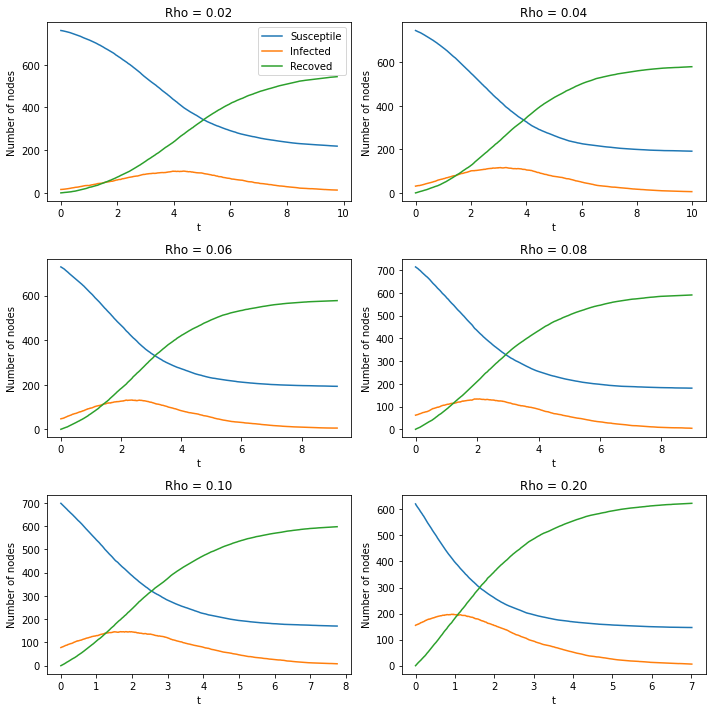

In [74]:
rho_values = [0.02,0.04,0.06,0.08,0.10,0.20]
tau = 0.08
gamma = 1

t1_ER,S1_ER,I1_ER,R1_ER = run_simulation_SIR(G_ER,tau,gamma,rho_values[0])
t2_ER,S2_ER,I2_ER,R2_ER = run_simulation_SIR(G_ER,tau,gamma,rho_values[1])
t3_ER,S3_ER,I3_ER,R3_ER = run_simulation_SIR(G_ER,tau,gamma,rho_values[2])
t4_ER,S4_ER,I4_ER,R4_ER = run_simulation_SIR(G_ER,tau,gamma,rho_values[3])
t5_ER,S5_ER,I5_ER,R5_ER = run_simulation_SIR(G_ER,tau,gamma,rho_values[4])
t6_ER,S6_ER,I6_ER,R6_ER = run_simulation_SIR(G_ER,tau,gamma,rho_values[5])

fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(321)

ax1.plot(t1_ER,S1_ER,label = 'Susceptile')
ax1.plot(t1_ER,I1_ER,label = 'Infected')
ax1.plot(t1_ER,R1_ER,label = 'Recoved')
ax1.set_title('Rho = {:.2f}'.format(rho_values[0]))
ax1.set_xlabel("t")
ax1.set_ylabel("Number of nodes")
ax1.legend()

ax2 = fig.add_subplot(322)

ax2.plot(t2_ER,S2_ER,label = 'Susceptile')
ax2.plot(t2_ER,I2_ER,label = 'Infected')
ax2.plot(t2_ER,R2_ER,label = 'Recoved')
ax2.set_title('Rho = {:.2f}'.format(rho_values[1]))
ax2.set_xlabel("t")
ax2.set_ylabel("Number of nodes")

ax3 = fig.add_subplot(323)

ax3.plot(t3_ER,S3_ER,label = 'Susceptile')
ax3.plot(t3_ER,I3_ER,label = 'Infected')
ax3.plot(t3_ER,R3_ER,label = 'Recoved')
ax3.set_title('Rho = {:.2f}'.format(rho_values[2]))
ax3.set_xlabel("t")
ax3.set_ylabel("Number of nodes")

ax4 = fig.add_subplot(324)

ax4.plot(t4_ER,S4_ER,label = 'Susceptile')
ax4.plot(t4_ER,I4_ER,label = 'Infected')
ax4.plot(t4_ER,R4_ER,label = 'Recoved')
ax4.set_title('Rho = {:.2f}'.format(rho_values[3]))
ax4.set_xlabel("t")
ax4.set_ylabel("Number of nodes")

ax5 = fig.add_subplot(325)

ax5.plot(t5_ER,S5_ER,label = 'Susceptile')
ax5.plot(t5_ER,I5_ER,label = 'Infected')
ax5.plot(t5_ER,R5_ER,label = 'Recoved')
ax5.set_title('Rho = {:.2f}'.format(rho_values[4]))
ax5.set_xlabel("t")
ax5.set_ylabel("Number of nodes")

ax6 = fig.add_subplot(326)

ax6.plot(t6_ER,S6_ER,label = 'Susceptile')
ax6.plot(t6_ER,I6_ER,label = 'Infected')
ax6.plot(t6_ER,R6_ER,label = 'Recoved')
ax6.set_title('Rho = {:.2f}'.format(rho_values[5]))
ax6.set_xlabel("t")
ax6.set_ylabel("Number of nodes")
plt.tight_layout()
plt.show()

doing Event-driven simulation


c:\users\tuomo\pycharmprojects\venv\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


doing Event-driven simulation
doing Event-driven simulation
doing Event-driven simulation
doing Event-driven simulation
doing Event-driven simulation


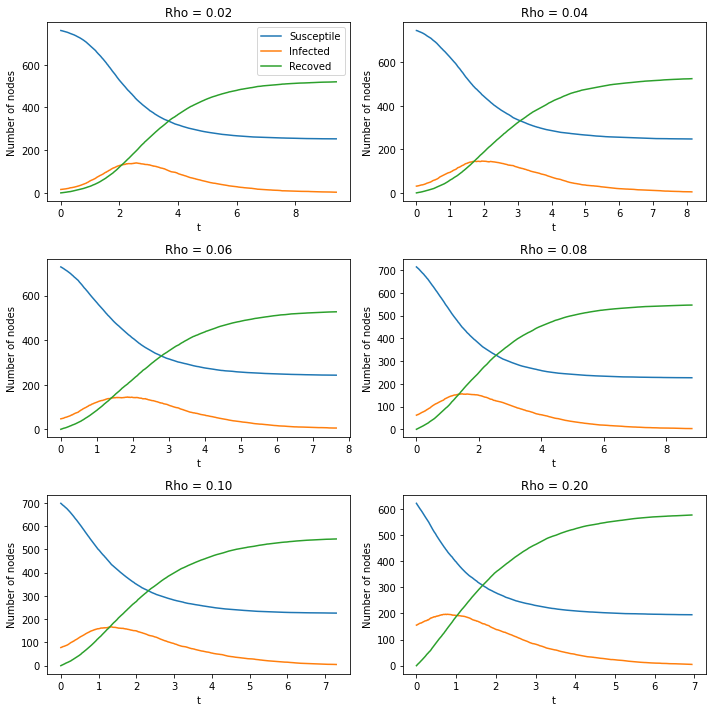

In [75]:
#BA
rho_values = [0.02,0.04,0.06,0.08,0.10,0.20]
tau = 0.08
gamma = 1

t1_BA,S1_BA,I1_BA,R1_BA = run_simulation_SIR(G_BA,tau,gamma,rho_values[0])
t2_BA,S2_BA,I2_BA,R2_BA = run_simulation_SIR(G_BA,tau,gamma,rho_values[1])
t3_BA,S3_BA,I3_BA,R3_BA = run_simulation_SIR(G_BA,tau,gamma,rho_values[2])
t4_BA,S4_BA,I4_BA,R4_BA = run_simulation_SIR(G_BA,tau,gamma,rho_values[3])
t5_BA,S5_BA,I5_BA,R5_BA = run_simulation_SIR(G_BA,tau,gamma,rho_values[4])
t6_BA,S6_BA,I6_BA,R6_BA = run_simulation_SIR(G_BA,tau,gamma,rho_values[5])

fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(321)

ax1.plot(t1_BA,S1_BA,label = 'Susceptile')
ax1.plot(t1_BA,I1_BA,label = 'Infected')
ax1.plot(t1_BA,R1_BA,label = 'Recoved')
ax1.set_title('Rho = {:.2f}'.format(rho_values[0]))
ax1.set_xlabel("t")
ax1.set_ylabel("Number of nodes")
ax1.legend()

ax2 = fig.add_subplot(322)

ax2.plot(t2_BA,S2_BA,label = 'Susceptile')
ax2.plot(t2_BA,I2_BA,label = 'Infected')
ax2.plot(t2_BA,R2_BA,label = 'Recoved')
ax2.set_title('Rho = {:.2f}'.format(rho_values[1]))
ax2.set_xlabel("t")
ax2.set_ylabel("Number of nodes")

ax3 = fig.add_subplot(323)

ax3.plot(t3_BA,S3_BA,label = 'Susceptile')
ax3.plot(t3_BA,I3_BA,label = 'Infected')
ax3.plot(t3_BA,R3_BA,label = 'Recoved')
ax3.set_title('Rho = {:.2f}'.format(rho_values[2]))
ax3.set_xlabel("t")
ax3.set_ylabel("Number of nodes")

ax4 = fig.add_subplot(324)

ax4.plot(t4_BA,S4_BA,label = 'Susceptile')
ax4.plot(t4_BA,I4_BA,label = 'Infected')
ax4.plot(t4_BA,R4_BA,label = 'Recoved')
ax4.set_title('Rho = {:.2f}'.format(rho_values[3]))
ax4.set_xlabel("t")
ax4.set_ylabel("Number of nodes")

ax5 = fig.add_subplot(325)

ax5.plot(t5_BA,S5_BA,label = 'Susceptile')
ax5.plot(t5_BA,I5_BA,label = 'Infected')
ax5.plot(t5_BA,R5_BA,label = 'Recoved')
ax5.set_title('Rho = {:.2f}'.format(rho_values[4]))
ax5.set_xlabel("t")
ax5.set_ylabel("Number of nodes")

ax6 = fig.add_subplot(326)

ax6.plot(t6_BA,S6_BA,label = 'Susceptile')
ax6.plot(t6_BA,I6_BA,label = 'Infected')
ax6.plot(t6_BA,R6_BA,label = 'Recoved')
ax6.set_title('Rho = {:.2f}'.format(rho_values[5]))
ax6.set_xlabel("t")
ax6.set_ylabel("Number of nodes")
plt.tight_layout()
plt.show()

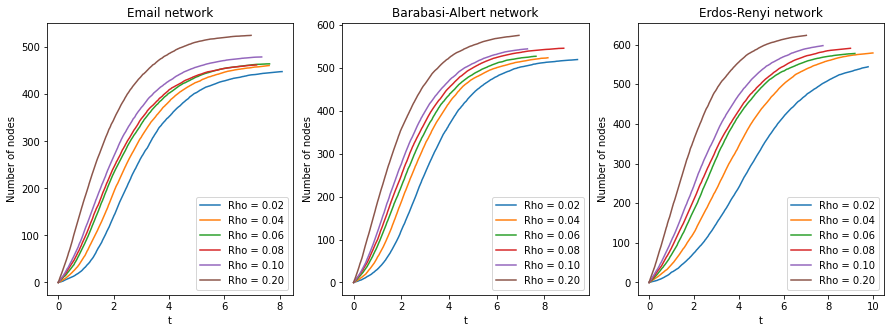

In [76]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(131)
ax1.plot(t1_EM,R1_EM,label = 'Rho = {:.2f}'.format(rho_values[0]))
ax1.plot(t2_EM,R2_EM,label = 'Rho = {:.2f}'.format(rho_values[1]))
ax1.plot(t3_EM,R3_EM,label = 'Rho = {:.2f}'.format(rho_values[2]))
ax1.plot(t4_EM,R4_EM,label = 'Rho = {:.2f}'.format(rho_values[3]))
ax1.plot(t5_EM,R5_EM,label = 'Rho = {:.2f}'.format(rho_values[4]))
ax1.plot(t6_EM,R6_EM,label = 'Rho = {:.2f}'.format(rho_values[5]))
ax1.set_title('Email network')
ax1.set_xlabel("t")
ax1.set_ylabel("Number of nodes")
ax1.legend()

ax2 = fig.add_subplot(132)

ax2.plot(t1_BA,R1_BA,label = 'Rho = {:.2f}'.format(rho_values[0]))
ax2.plot(t2_BA,R2_BA,label = 'Rho = {:.2f}'.format(rho_values[1]))
ax2.plot(t3_BA,R3_BA,label = 'Rho = {:.2f}'.format(rho_values[2]))
ax2.plot(t4_BA,R4_BA,label = 'Rho = {:.2f}'.format(rho_values[3]))
ax2.plot(t5_BA,R5_BA,label = 'Rho = {:.2f}'.format(rho_values[4]))
ax2.plot(t6_BA,R6_BA,label = 'Rho = {:.2f}'.format(rho_values[5]))
ax2.set_title('Barabasi-Albert network')
ax2.set_xlabel("t")
ax2.set_ylabel("Number of nodes")
ax2.legend()

ax3 = fig.add_subplot(133)

ax3.plot(t1_ER,R1_ER,label = 'Rho = {:.2f}'.format(rho_values[0]))
ax3.plot(t2_ER,R2_ER,label = 'Rho = {:.2f}'.format(rho_values[1]))
ax3.plot(t3_ER,R3_ER,label = 'Rho = {:.2f}'.format(rho_values[2]))
ax3.plot(t4_ER,R4_ER,label = 'Rho = {:.2f}'.format(rho_values[3]))
ax3.plot(t5_ER,R5_ER,label = 'Rho = {:.2f}'.format(rho_values[4]))
ax3.plot(t6_ER,R6_ER,label = 'Rho = {:.2f}'.format(rho_values[5]))
ax3.set_title('Erdos-Renyi network')
ax3.set_xlabel("t")
ax3.set_ylabel("Number of nodes")
ax3.legend()